### Keras API Task

In [1]:
from tensorflow.keras.datasets import mnist

mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [2]:
(train_images, train_targets),(test_images, test_targets) = mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
def show_images(images, targets, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[targets[i]])

In [4]:
import matplotlib.pyplot as plt
class_names = [0,1,2,3,4,5,6,7,8,9]

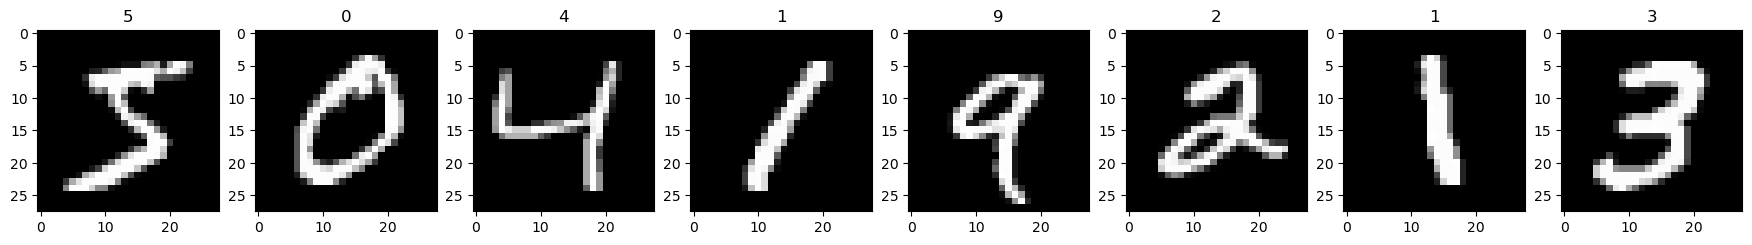

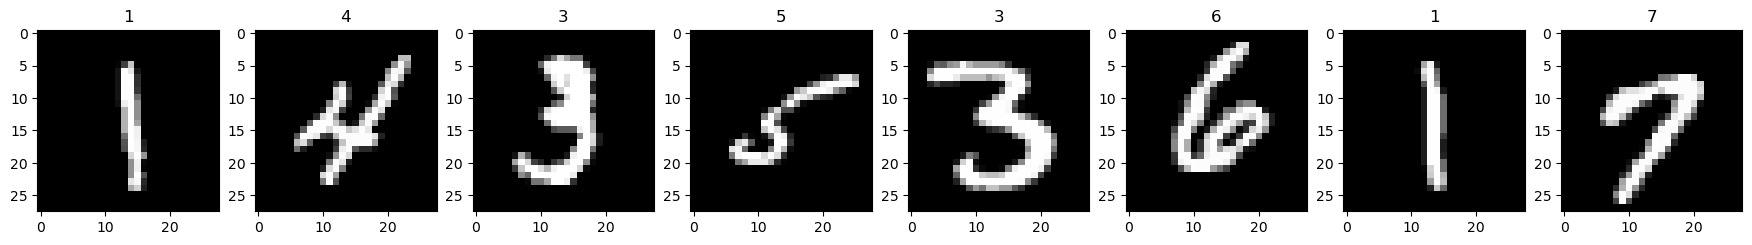

In [5]:
show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

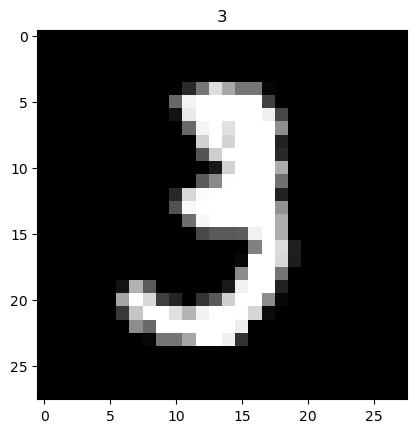

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_images[10], cmap = 'gray')
plt.title(train_targets[10])
plt.show()

In [7]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images/255.0, dtype= np.float32)
    targets = np.array(targets, dtype = np.float32)

    return images, targets 
    
train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [10]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [11]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.8453 - loss: 0.5520
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9578 - loss: 0.1407
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.9696 - loss: 0.0974
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.9772 - loss: 0.0719
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.9805 - loss: 0.0621
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.9860 - loss: 0.0452
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.9873 - loss: 0.0398
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.9883 - loss: 0.0351
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.9899 - loss: 0.0296
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.9932 - loss: 0.0229
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.9932 - loss: 0.0214
Epoch 12/20
938/938 ━━━━━━━━━━

In [12]:
pred_prob = model.predict(np.expand_dims(test_images[5094], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[5.0627858e-15 5.2882126e-12 1.6766931e-12 1.2904619e-11 1.1769484e-15
  5.6802504e-14 1.9570593e-23 9.9999905e-01 5.5092638e-16 9.1795431e-07]]


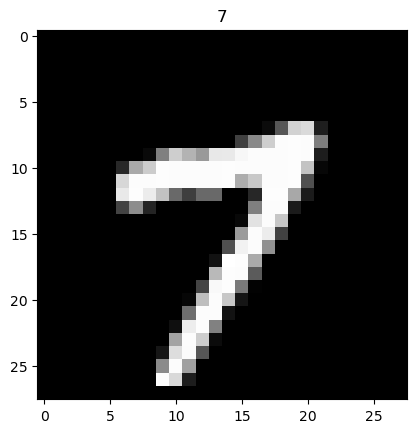

In [13]:
import matplotlib.pyplot as plt

class_names = [0,1,2,3,4,5,6,7,8,9]

plt.imshow(test_images[5094], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [14]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.9705 - loss: 0.1378  


[0.11681444197893143, 0.9760000109672546]

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=2)

Epoch 1/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9152 - loss: 0.2900 - val_accuracy: 0.9506 - val_loss: 0.1681
Epoch 2/20
1500/1500 - 1s - 829us/step - accuracy: 0.9609 - loss: 0.1282 - val_accuracy: 0.9643 - val_loss: 0.1238
Epoch 3/20
1500/1500 - 1s - 859us/step - accuracy: 0.9728 - loss: 0.0888 - val_accuracy: 0.9624 - val_loss: 0.1308
Epoch 4/20
1500/1500 - 1s - 781us/step - accuracy: 0.9768 - loss: 0.0715 - val_accuracy: 0.9651 - val_loss: 0.1240
Epoch 5/20
1500/1500 - 1s - 778us/step - accuracy: 0.9806 - loss: 0.0587 - val_accuracy: 0.9706 - val_loss: 0.1080
Epoch 6/20
1500/1500 - 1s - 775us/step - accuracy: 0.9850 - loss: 0.0461 - val_accuracy: 0.9714 - val_loss: 0.1040
Epoch 7/20
1500/1500 - 1s - 783us/step - accuracy: 0.9873 - loss: 0.0395 - val_accuracy: 0.9718 - val_loss: 0.1008
Epoch 8/20
1500/1500 - 1s - 784us/step - accuracy: 0.9887 - loss: 0.0328 - val_accuracy: 0.9682 - val_loss: 0.1347
Epoch 9/20
1500/1500 - 1s - 768us/step - accuracy: 0.9906 - loss: 0.0275 - val_acc

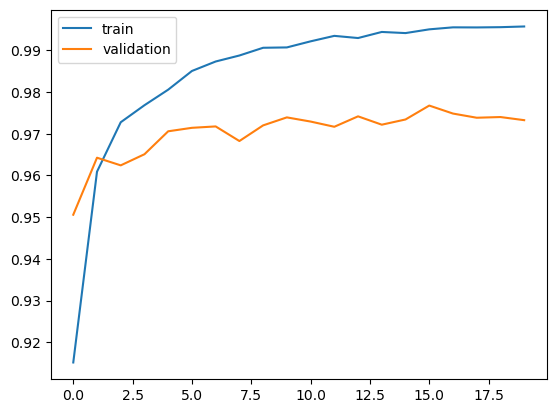

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


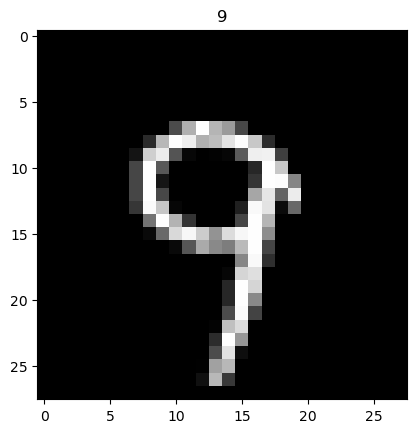

In [19]:
pred_prob = model.predict(np.expand_dims(test_images[2345], axis=0))

import matplotlib.pyplot as plt

class_names = [0,1,2,3,4,5,6,7,8,9]

plt.imshow(test_images[2345], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [20]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.9678 - loss: 0.1702


[0.14121414721012115, 0.9724000096321106]

In [21]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape = (INPUT_SIZE,INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs = input_tensor, outputs = output)
    return model

In [22]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(train_images, train_targets),(test_images, test_targets) = mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images/255.0, dtype= np.float32)
    targets = np.array(targets, dtype = np.float32)

    return images, targets 

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [23]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets),(test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets,test_images, test_targets)

print(train_images.shape,train_oh_targets.shape)
print(validation_images.shape,validation_oh_targets.shape)
print(test_images.shape,test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [24]:
model = create_model()
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [26]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8229 - loss: 0.6228 - val_accuracy: 0.9455 - val_loss: 0.1851
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9546 - loss: 0.1540 - val_accuracy: 0.9617 - val_loss: 0.1233
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.9692 - loss: 0.1003 - val_accuracy: 0.9652 - val_loss: 0.1118
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 0.9766 - loss: 0.0768 - val_accuracy: 0.9688 - val_loss: 0.0995
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.9801 - loss: 0.0623 - val_accuracy: 0.9700 - val_loss: 0.1011
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.9839 - loss: 0.0528 - val_accuracy: 0.9703 - val_loss: 0.0955
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.9867 - loss: 0.0421 - val_accuracy: 0.9688 - val_loss: 0.1105
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.9880 - loss: 0.0384 - val_

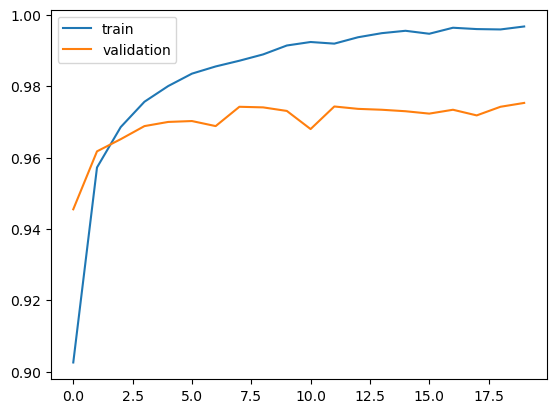

In [27]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


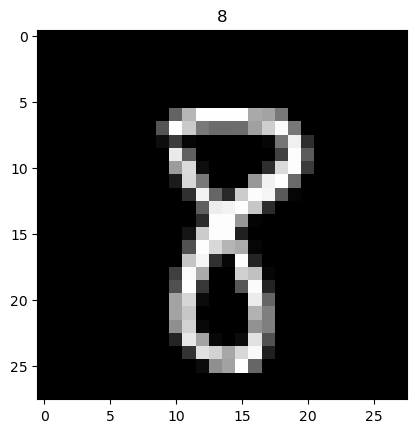

In [28]:
pred_prob = model.predict(np.expand_dims(test_images[4545], axis=0))

import matplotlib.pyplot as plt

class_names = [0,1,2,3,4,5,6,7,8,9]

plt.imshow(test_images[4545], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [29]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9706 - loss: 0.1452


[0.12801818549633026, 0.9735000133514404]